In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#loading data
data = pd.read_csv('datasets/diabetes.csv')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


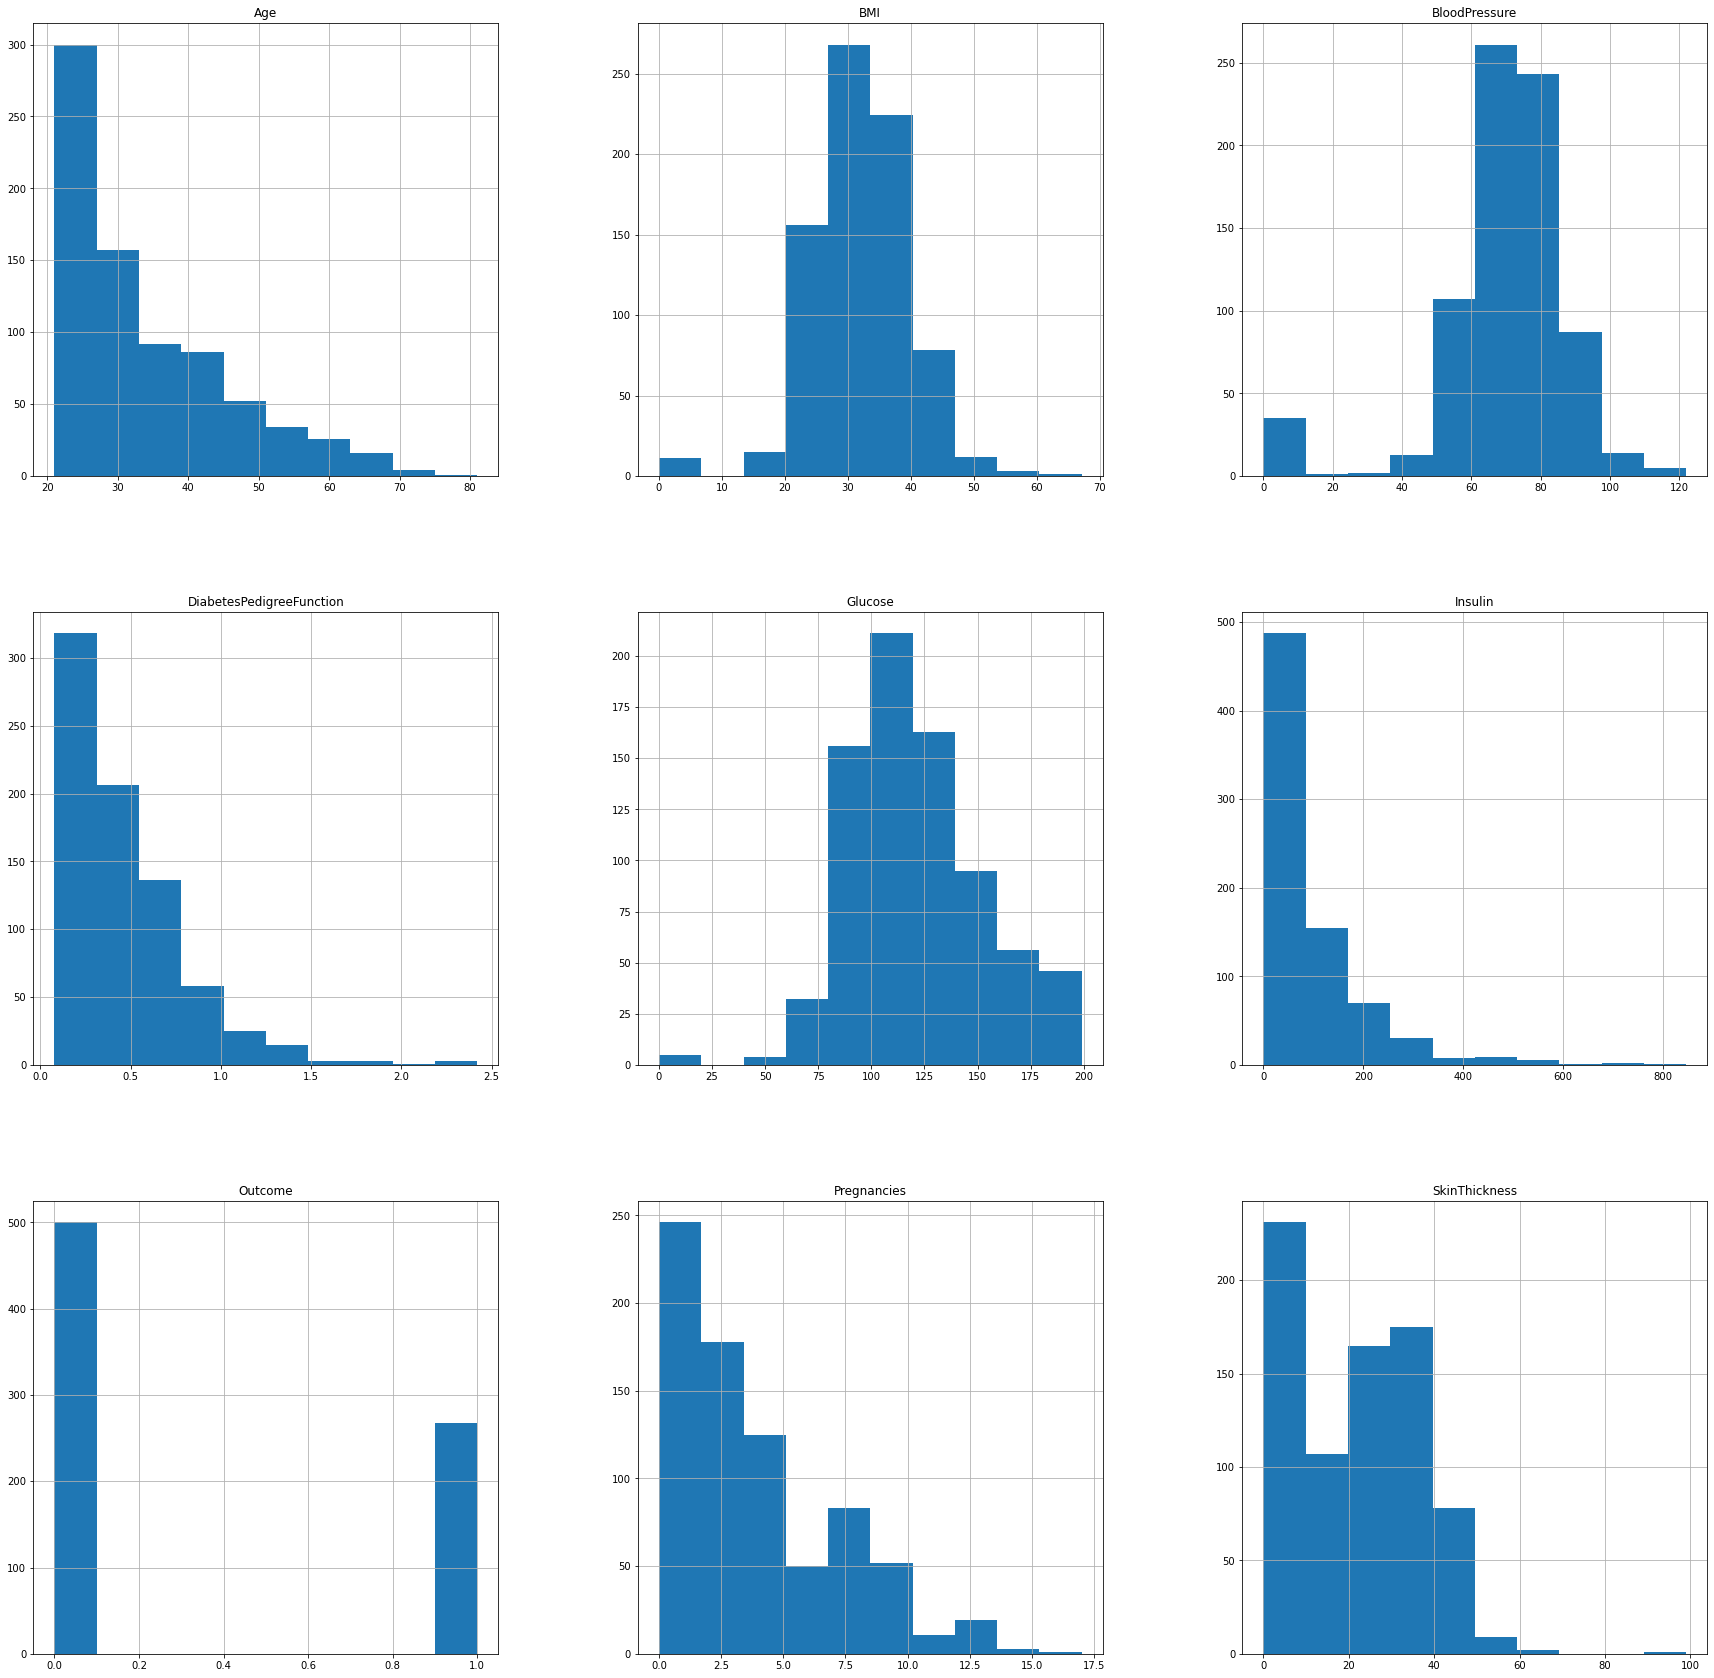

In [2]:
hist = data.hist(figsize=(30,30))

In [3]:
data_cleaned = data.copy(deep=True)
data_cleaned[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_cleaned[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
data_cleaned['Glucose'].fillna(data_cleaned['Glucose'].mean(), inplace=True)
data_cleaned['BloodPressure'].fillna(data_cleaned['BloodPressure'].mean(), inplace=True)
data_cleaned['SkinThickness'].fillna(data_cleaned['SkinThickness'].median(), inplace=True)
data_cleaned['Insulin'].fillna(data_cleaned['Insulin'].median(), inplace=True)
data_cleaned['BMI'].fillna(data_cleaned['BMI'].median(), inplace=True)

data_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


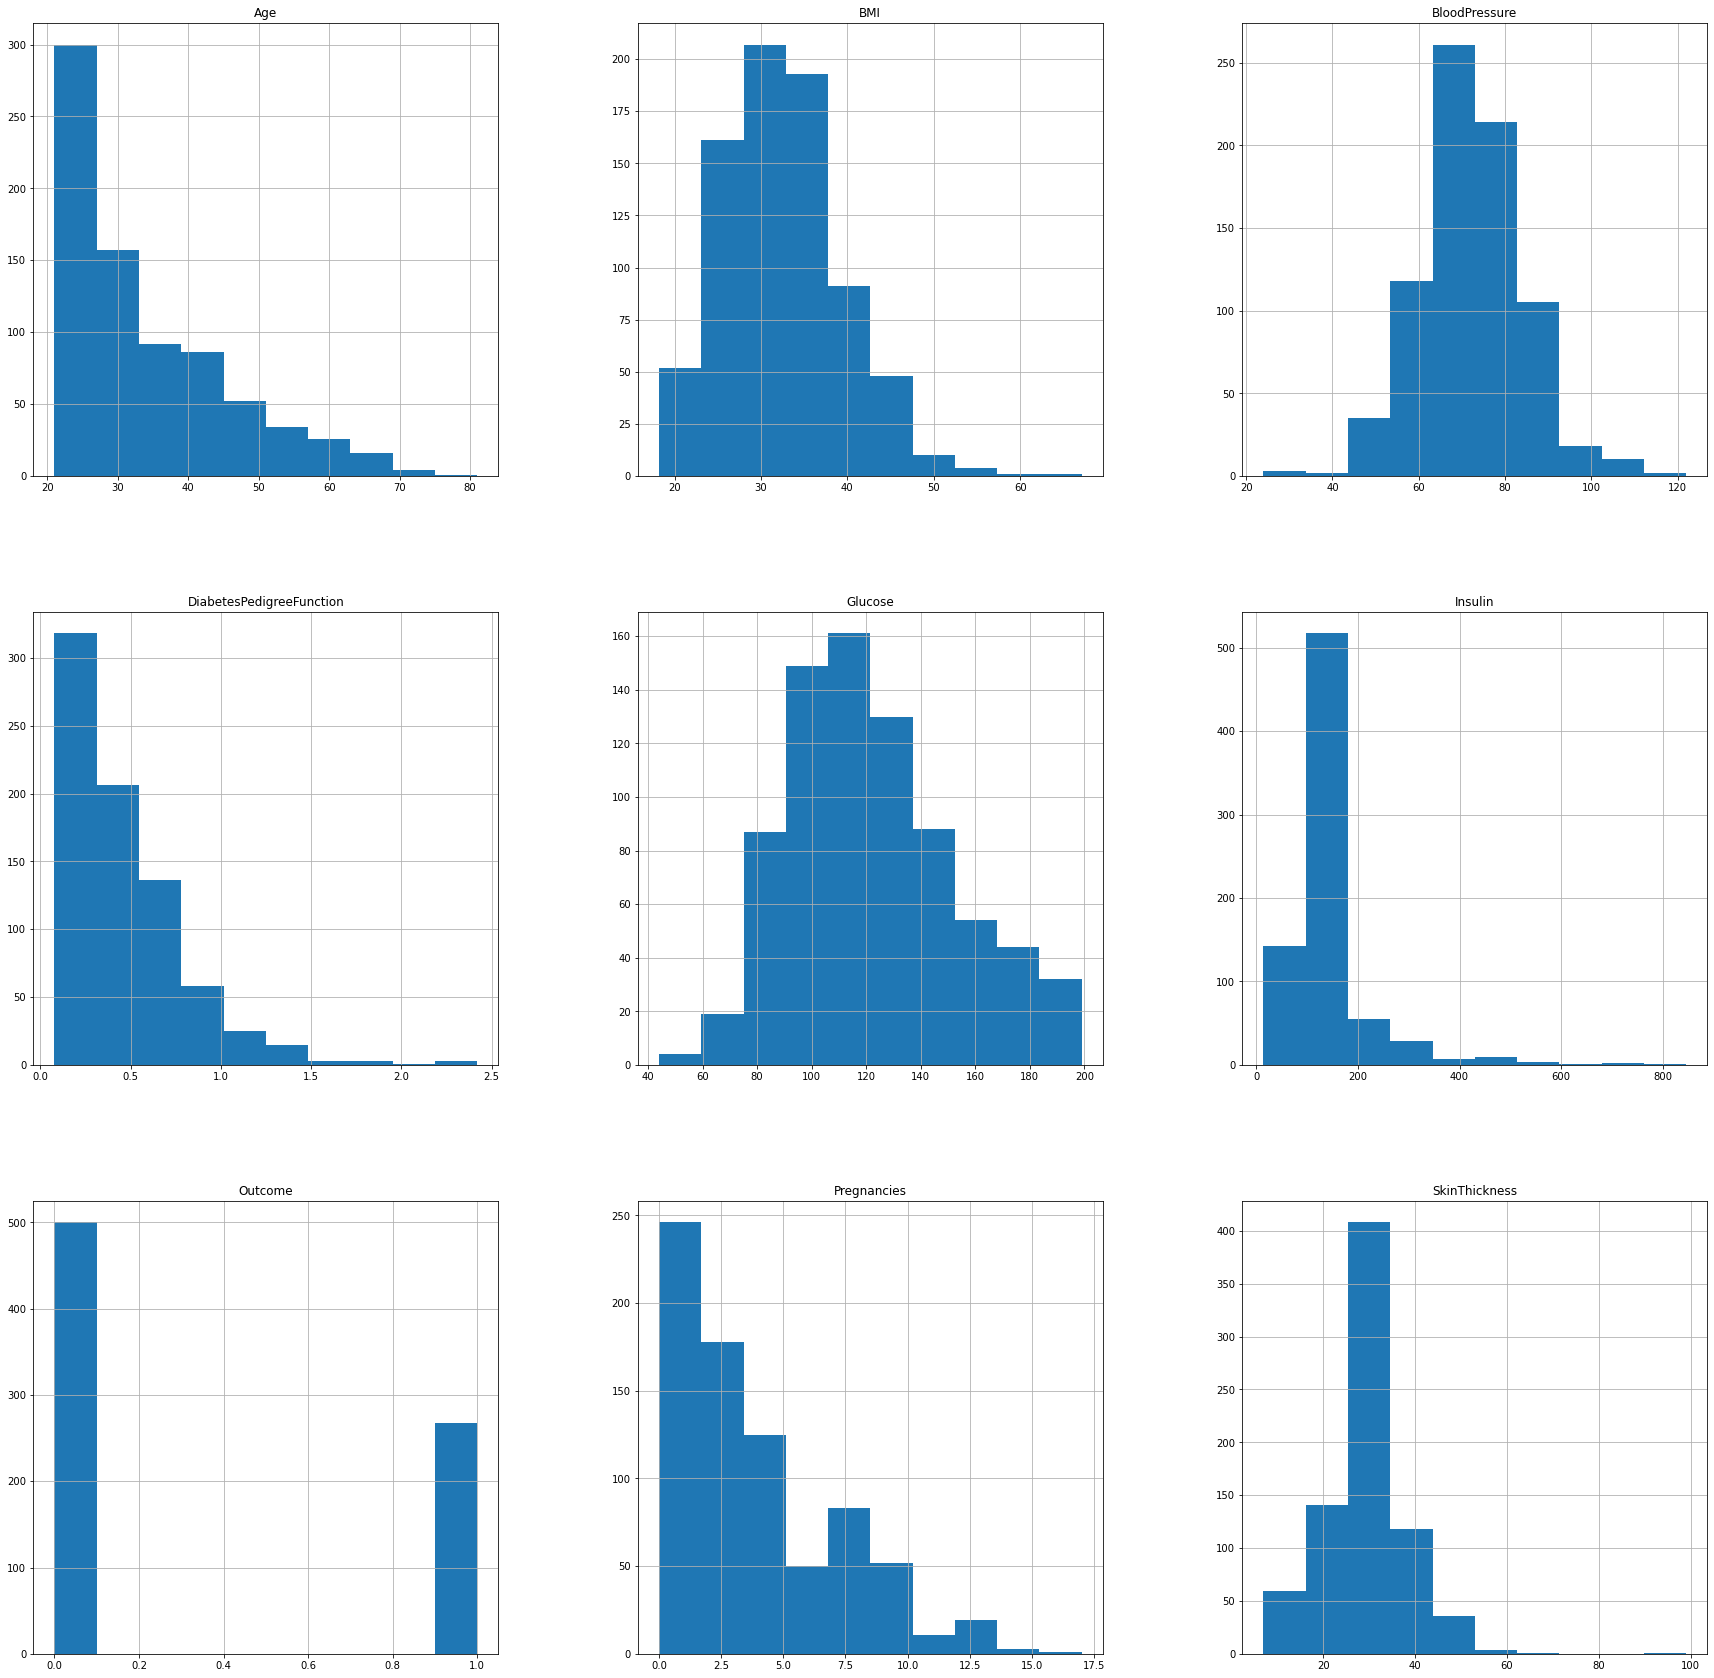

In [4]:
hist = data_cleaned.hist(figsize=(30,30))

In [5]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
cols_X = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
cols_y = ['Outcome']
X,y = data_cleaned[cols_X], data_cleaned[cols_y[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train, y_train);
print("Training complete")

Training complete


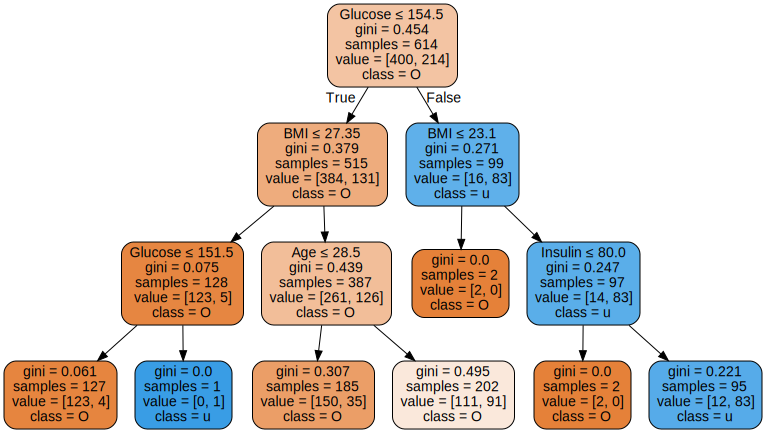

In [6]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, feature_names=cols_X, class_names=cols_y[0], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [7]:
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)
acc_test = metrics.accuracy_score(y_test, pred_test)
acc_train = metrics.accuracy_score(y_train,pred_train)
print("Accuracy on test set={}".format(acc_test))
print("Accuracy on train set={}".format(acc_train))

Accuracy on test set=0.6883116883116883
Accuracy on train set=0.7687296416938111


In [8]:
report_test = metrics.classification_report(y_test, pred_test)
print(report_test)

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       100
           1       0.64      0.26      0.37        54

    accuracy                           0.69       154
   macro avg       0.67      0.59      0.58       154
weighted avg       0.68      0.69      0.64       154



In [9]:
report_train = metrics.classification_report(y_train, pred_train)
print(report_train)

              precision    recall  f1-score   support

           0       0.75      0.97      0.85       400
           1       0.88      0.39      0.54       214

    accuracy                           0.77       614
   macro avg       0.81      0.68      0.69       614
weighted avg       0.79      0.77      0.74       614



Text(0.5, 15.0, 'Predicted value')

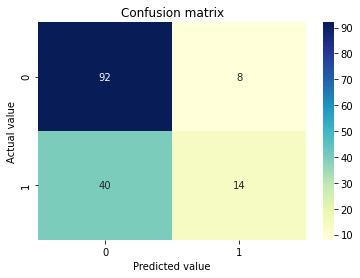

In [10]:
import seaborn as sns
confusion_matrix_test = metrics.confusion_matrix(y_test, pred_test)
p = sns.heatmap(pd.DataFrame(confusion_matrix_test), annot=True, cmap="YlGnBu", fmt="g")
plt.title('Confusion matrix')
plt.ylabel('Actual value')
plt.xlabel('Predicted value')

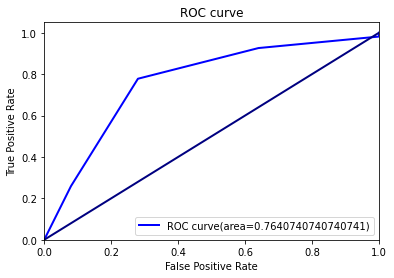

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thr = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='blue', lw=lw, label='ROC curve(area={})'.format(roc_auc))
plt.plot([0,1], [0,1], color='navy', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

In [12]:
from sklearn.model_selection import StratifiedKFold
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
kf = StratifiedKFold(n_splits=10)
X_train_copy = X_train.copy(deep=True)
y_train_copy = y_train.copy(deep=True)
acc_max = 0
for max_depth in range(1,20):
    acc=[]
    for train_index, val_index in kf.split(X_train_copy, y_train_copy):
        X_train_cv, X_val = X_train_copy.iloc[train_index], X_train_copy.iloc[val_index]
        y_train_cv, y_val = y_train_copy.iloc[train_index], y_train_copy.iloc[val_index]
        model = tree.DecisionTreeClassifier(max_depth=max_depth)
        model = model.fit(X_train_cv, y_train_cv)
        pred_val = model.predict(X_val)
        acc_cur = metrics.accuracy_score(y_val, pred_val)
        acc.append(acc_cur)
#     print(acc)
    print("Accuracy with max tree depth of {} = {}".format(max_depth, np.mean(acc)))
    if np.mean(acc) > acc_max:
        acc_max = np.mean(acc)
        max_depth_best = max_depth
print("Best max tree depth value based on cross validation = {}".format(max_depth_best))
model = tree.DecisionTreeClassifier(max_depth=max_depth_best)
model = model.fit(X_train, y_train)
pred_test = model.predict(X_test)
acc_test = metrics.accuracy_score(y_test, pred_test)
print("Accuracy on test set = {}".format(acc_test))

Accuracy with max tree depth of 1 = 0.7376520359598097
Accuracy with max tree depth of 2 = 0.7443680592279217
Accuracy with max tree depth of 3 = 0.7474616604970915
Accuracy with max tree depth of 4 = 0.7263088313061872
Accuracy with max tree depth of 5 = 0.7279746166049709
Accuracy with max tree depth of 6 = 0.7085404547858277
Accuracy with max tree depth of 7 = 0.680750925436277
Accuracy with max tree depth of 8 = 0.6823638286620837
Accuracy with max tree depth of 9 = 0.6693019566367002
Accuracy with max tree depth of 10 = 0.6710999471179269
Accuracy with max tree depth of 11 = 0.6661819143310417
Accuracy with max tree depth of 12 = 0.6580116340560549
Accuracy with max tree depth of 13 = 0.6710999471179269
Accuracy with max tree depth of 14 = 0.6596774193548387
Accuracy with max tree depth of 15 = 0.6579587519830777
Accuracy with max tree depth of 16 = 0.6678212585933367
Accuracy with max tree depth of 17 = 0.6727128503437335
Accuracy with max tree depth of 18 = 0.6660232681121101
Ac

In [13]:
pred_test = (model.predict_proba(X_test)[:,1] >= 0.5).astype(bool)
report_test = metrics.classification_report(y_test, pred_test)
print(report_test)

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       100
           1       0.64      0.26      0.37        54

    accuracy                           0.69       154
   macro avg       0.67      0.59      0.58       154
weighted avg       0.68      0.69      0.64       154



In [14]:
# # from imblearn.under_sampling import RandomUnderSampler
# # rus = RandomUnderSampler(random_state=42, ratio={0:50, 1:50})
# # rus.fit(X_train, y_train)
# # X_train_resampled, y_train_resampled = rus.sample(X_train, y_train)
# y_label_0, y_label_1 = 
# model = tree.DecisionTreeClassifier(max_depth=3)
# model = model.fit(X_train_resampled, y_train_resampled)
# pred_test = model.predict(X_test)
# acc_test = metrics.accuracy_score(y_test, pred_test)
# print("Accuracy on test set = {}".format(acc_test))

SyntaxError: invalid syntax (<ipython-input-14-b02517076201>, line 5)